# Laplace's equation

In [1]:
# Import libraries.
from matplotlib import pyplot, cm
from mpl_toolkits import mplot3d
import numpy
global pi
pi = numpy.pi
%matplotlib inline

In [2]:
# Change default font family and size for Matplotlib figures.
pyplot.rc('font', family='serif', size=16)

## Problem setup

Solve the Laplace's equation $\nabla^2 u = 0$ in the domain $\Omega = \left[ 0, L_x \right] \times \left[ 0, L_y \right]$

<img src="figures/application_setup.png" alt="application_setup" width="300"/>

Initial guess: $u = 0$ everywhere inside the domain.

## Analytical solution

$$
u \left( x, y \right) = \frac{\sinh \left( \frac{3}{2} \pi \frac{y}{L_y} \right)}{\sinh \left( \frac{3}{2} \pi \frac{L_x}{L_y} \right)} \sin \left( \frac{3}{2} \pi \frac{x}{L_x} \right)
$$

In [3]:
def laplace_solution(x, y, Lx, Ly):
    """Return the analytical solution.

    Parameters
    ----------
    x : numpy.ndarray
        Coordinates along the x direction as a 1D array of floats.
    y : numpy.ndarray
        Coordinates along the y direction as a 1D array of floats.
    Lx : float
        Length of the domain in the x direction.
    Ly : float
        Length of the domain in the y direction.

    Returns
    -------
    u : numpy.ndarray
        The analytical solution as a 2D array of floats.

    """
    X, Y = numpy.meshgrid(x, y)
    u = (numpy.sinh(1.5*pi*(Y/Ly))/
         numpy.sinh(1.5*pi*(Lx/Ly)))*numpy.sin(1.5*pi*(x/Lx))
    
    return u

In [4]:
def plot_3d(x, y, u, label='$z$', elev=30.0, azim=45.0):
    """Create a 3D surface plot of the scalar field `u`.

    Parameters
    ----------
    x : numpy.ndarray
        Gridline locations in the x direction as a 1D array of floats.
    y : numpy.ndarray
        Gridline locations in the y direction as a 1D array of floats.
    u : numpy.ndarray
        Scalar field to plot as a 2D array of floats.
    label : string, optional
        Axis label to use in the third direction; default: 'z'.
    elev : float, optional
        Elevation angle in the z plane; default: 30.0.
    azim : float, optional
        Azimuth angle in the x,y plane; default: 45.0.

    """
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim=azim)

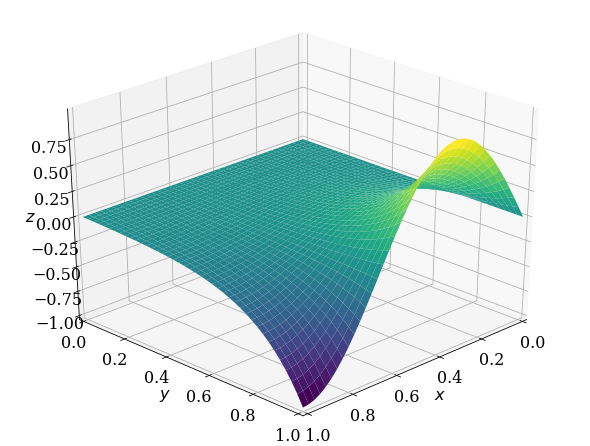

In [5]:
# Set parameters.
Lx, Ly = 1.0, 1.0  # lengths of the domain
nx, ny = 41, 41  # number of points along each direction

# Define grid-point locations.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

###
u = laplace_solution(x, y, Lx, Ly)
plot_3d(x,y,u)
###


## Initial solution

<img src="figures/application_setup.png" alt="application_setup" width="300"/>

Initial guess: $u = 0$ everywhere inside the domain.

Boundary values:

* Bottom and left: $u = 0$
* Top: $u = \sin \left( \frac{3}{2} \pi \frac{x}{L_x} \right)$
* Right: $\frac{\partial u}{\partial x} = 0$

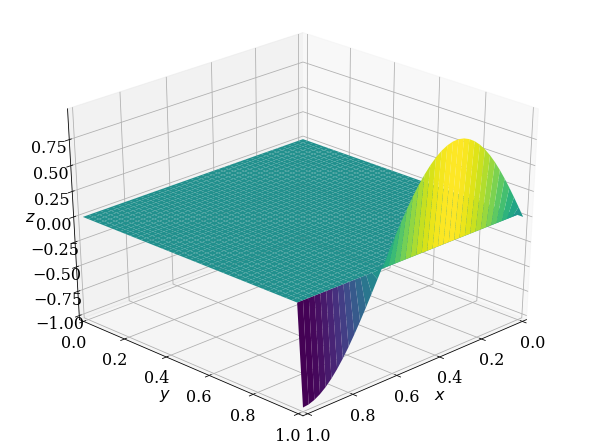

In [6]:
###
u0 = numpy.zeros((41,41))
# u0[1:-1,1:-1] = -.02
u0[-1,:] = numpy.sin(1.5*pi*(x/Lx))
###


###
plot_3d(x,y,u0)
###


## Jacobi method

$$
u_{i, j}^{k+1} = \frac{1}{4} \left( u_{i, j-1}^k + u_{i-1, j}^k + u_{i+1, j}^k + u_{i, j+1}^k \right)
$$

In [7]:
def laplace_2d_jacobi(u0, maxiter=20000, rtol=1e-8):
    """Solve the 2D Laplace equation using Jacobi method.

    Parameters
    ----------
    u0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform; default: 20000.
    rtol : float, optional
        Relative tolerance for convergence; default: 1e-8.

    Returns
    -------
    u : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations computed.
    diff : float
        The final relative L2-norm of the difference.

    """
    u = u0.copy()  # create copy to not overwrite initial guess
    diff = rtol + 1.0  # initialize residual to "high" value
    ite = 0  # initialize iteration index
    while diff > rtol and ite < maxiter:
        un = u.copy()  # store the solution at previous iteration
        ite += 1  # update the iteration index
        ###
        u[1:-1,1:-1] = 0.25*(u[1:-1,:-2] + u[:-2,1:-1] +
                             u[2:, 1:-1] + u[1:-1, 2:])
        # To do: Update the value at boundaries (where necessary).
        u[:,-1] = u[:,-2]
        # To do: Compute `diff`, the relative L2-norm of the difference
        # in the solution between two successive iterations.
        diff = numpy.linalg.norm(u - un) / numpy.linalg.norm(un)
        ###

    return u, ite, diff

Iterations: 4473
Residual: 9.989969530475942e-09


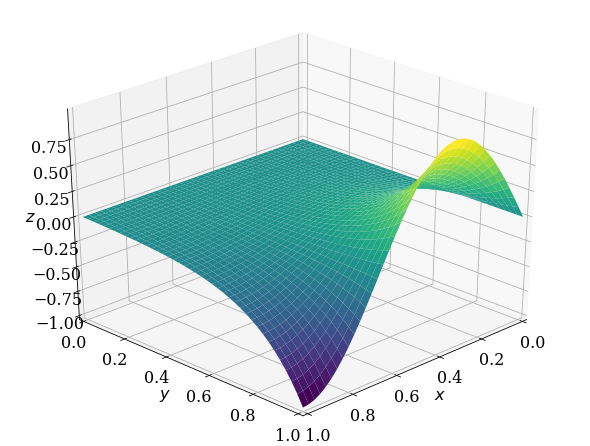

In [8]:
###
u2, k, diff = laplace_2d_jacobi(u0)
# To do: Compute the numerical solution of the Laplace equation.

print('Iterations: {0}'.format(k))
print('Residual: {0}'.format(diff))

###


###
# To do: Plot the numerical solution.
plot_3d(x,y,u)
###


## Convergence analysis

In [9]:
# List of grid-spacing sizes to investigate.
dx_vals = [0.1, 0.05, 0.025, 0.0125]

# Empty list to store the error on each grid.
errors = []

for dx in dx_vals:
    ###
    # To do: Re-create the space grid.
    nx = int((Lx/dx)+1)
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Lx, num=nx)
    # To do: re-set the initial guess.
    u0_2 = numpy.zeros((nx,nx))
    u0_2[-1,:] = numpy.sin(1.5*pi*(x/Lx))
    # To do: Relax the solution with Jacobi.
    u2, count, error = laplace_2d_jacobi(u0_2)
    # To do: Compute the analytical solution.
    u2a = laplace_solution(x,y,Lx,Lx)
    # To do: Compute and append the relative L2 error to `errors`.
    errors.append(numpy.linalg.norm(u2-u2a)/numpy.linalg.norm(u2a))
    ###
    

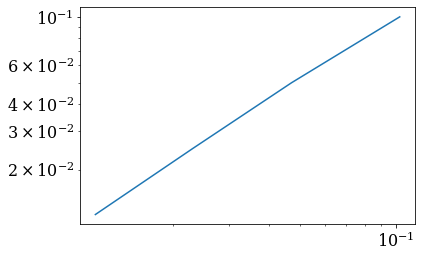

In [10]:
###
# To do: Plot (loglog) the error versus the grid-spacing size.
# Question: What's the order of convergence?
###
pyplot.loglog(errors, dx_vals)

## 2nd-order Neumann boundary conditions

In [11]:
def laplace_2d_jacobi_neumann(u0, maxiter=20000, rtol=1e-8):
    """Solve the 2D Laplace equation using Jacobi method.

    Use a second-order approximation for Neumann boundary conditions.

    Parameters
    ----------
    u0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform; default: 20000.
    rtol : float, optional
        Relative tolerance for convergence; default: 1e-8.

    Returns
    -------
    u : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    diff : float
        The final relative L2-norm of the difference.

    """
    u = u0.copy()  # create copy to not overwrite initial guess
    diff = rtol + 1.0  # initialize residual to "high" value
    ite = 0  # initialize iteration index
    while diff > rtol and ite < maxiter:
        un = u.copy()  # store the solution at previous iteration
        ite += 1  # update the iteration index
        ###
        # To do: Update the solution using Jacobi method.
        u[1:-1,1:-1] = 0.25 * (u[1:-1,2:] + u[2:,1:-1] + 
                               u[1:-1,:-2] + u[:-2, 1:-1])
        # To do: Update the value at boundaries (where necessary).
        u[1:-1,-1] = 0.25*(u[2:,-1] + u[:-2,-1] + 2.0*u[1:-1,-2])
        # To do: Compute `diff`, the relative L2-norm of the difference
        # in the solution between two successive iterations.
        diff = numpy.linalg.norm(u-un)/numpy.linalg.norm(un)
        ###
        
    return u, ite, diff

## Re-do convergence analysis

In [12]:
# List of grid-spacing sizes to investigate.
dx_vals = [0.1, 0.05, 0.025, 0.0125]

# Empty list to store the error on each grid.
errors = []

for dx in dx_vals:
    ###
    # To do: Re-create the space grid.
    nx = int((Lx/dx)+1)
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Lx, num=nx)
    # To do: re-set the initial guess.
    u0_2 = numpy.zeros((nx,nx))
    u0_2[-1,:] = numpy.sin(1.5*pi*(x/Lx))
    # To do: Relax the solution with Jacobi.
    u2, count, error = laplace_2d_jacobi_neumann(u0_2)
    # To do: Compute the analytical solution.
    u2a = laplace_solution(x,y,Lx,Lx)
    # To do: Compute and append the relative L2 error to `errors`.
    errors.append(numpy.linalg.norm(u2-u2a)/numpy.linalg.norm(u2a))
    ###

ValueError: x and y must have same first dimension, but have shapes (1,) and (4,)

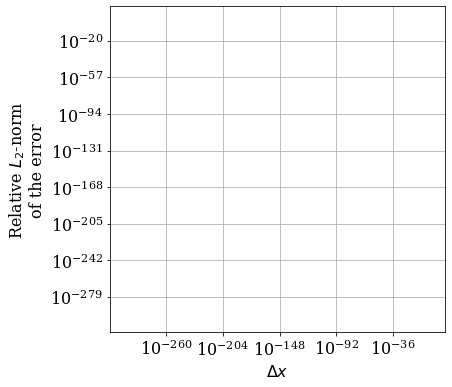

In [13]:
###
# To do: Plot (loglog) the error versus the grid-spacing size.
# Question: What's the order of convergence?
###
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx - 1))
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');